Conversion from .emd to .h5 format.

In [2]:
# Conversion Function Definitions

from conversion_def import find_and_process_velox_files

In [3]:
# Convert to HDF5
inputfolder_path= "/home/bubl3932/files/MFM300_VIII/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712"

find_and_process_velox_files(inputfolder_path)

converting /home/bubl3932/files/MFM300_VIII/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712.emd
6351714636094546b0251f19e0f133a0
/Data/Image/6351714636094546b0251f19e0f133a0/Data
original datset located in: /Data/Image/6351714636094546b0251f19e0f133a0/Data
original file renamed to backup
new file created with the original name
started copying image data
chunked dataset created and data copied
conversion successful, backup file deleted


Peakfinding using peakfinder8 from diffractem package. First open .h5 file in crystfel using .geom file that refers to correct mask file and find good peakfinding settings. Make sure there are enough friedel pairs for center beam finding and fitting. Don't put the mask in the same folder as the .h5 file since it is also .h5 format. If peakfinding has been run old data will be deleted.

In [4]:
# Peak Finder Function Definitions

from peakfinder_def import find_files_and_run_peakfinding

In [ ]:
# Peak Finder
inputfolder_path= "/home/bubl3932/files/MFM300_VIII/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712"

# Peakfinder settings:
threshold = 50            
min_snr = 5 
min_pix_count = 2
max_pix_count = 200
local_bg_radius = 3
min_res = 45    
max_res = 700
x0 = 512
y0 = 512  

##### Enter parameters above #####

find_files_and_run_peakfinding(inputfolder_path, x0, y0, threshold, min_snr, min_pix_count, max_pix_count, local_bg_radius, min_res, max_res)

Processing /home/bubl3932/files/MFM300_VIII/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712.h5
started processing MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712.h5
new datasets created
0 frames processed
1000 frames processed
2000 frames processed
3000 frames processed
4000 frames processed
5000 frames processed
6000 frames processed
7000 frames processed
8000 frames processed
9000 frames processed
10000 frames processed
11000 frames processed
12000 frames processed
13000 frames processed
14000 frames processed
15000 frames processed
16000 frames processed
17000 frames processed
18000 frames processed
19000 frames processed
20000 frames processed
21000 frames processed
22000 frames processed
23000 frames processed
24000 frames processed
25000 frames processed
26000 frames processed
27000 frames processed
28000 frames processed
29000 frames processed
30000 frames processed
31000 frames processed
3200

Find the center beam spot center on all frames using friedel pairs and  interpolation.

In [6]:
# Find Center Beam Spot Center Function Definitions

from centerfinding_def import find_files_and_run_centerfinding

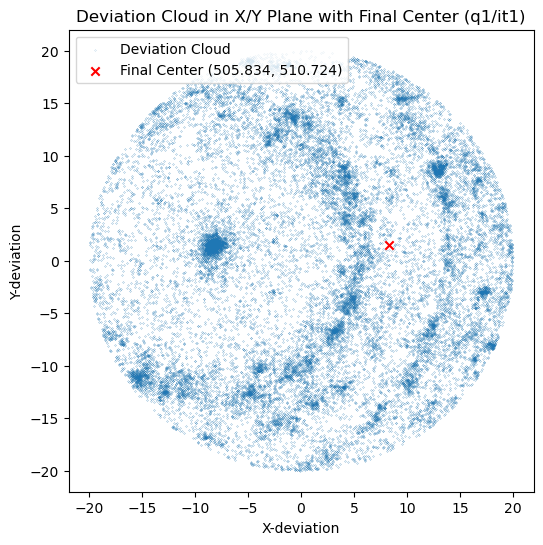

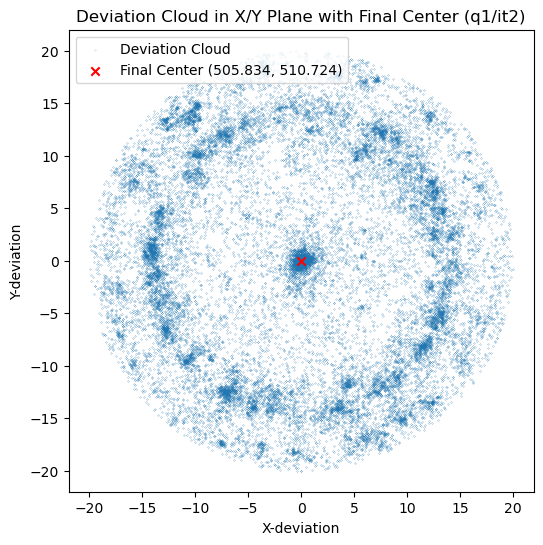

Quarter 1 processed in 1 iterations, final center = [505.834, 510.724], mean deviation = [6.108e-04,4.229e-04]


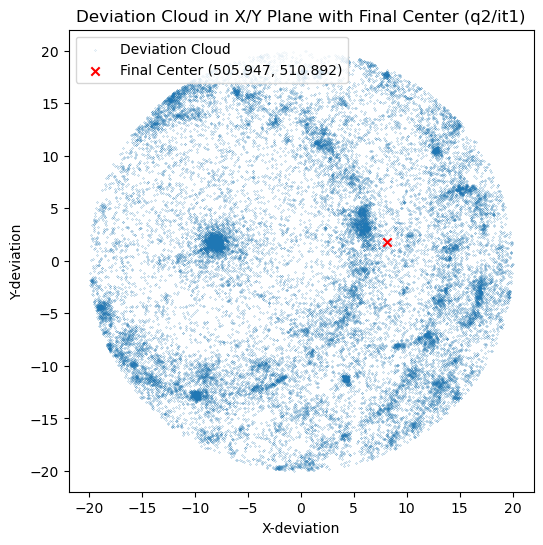

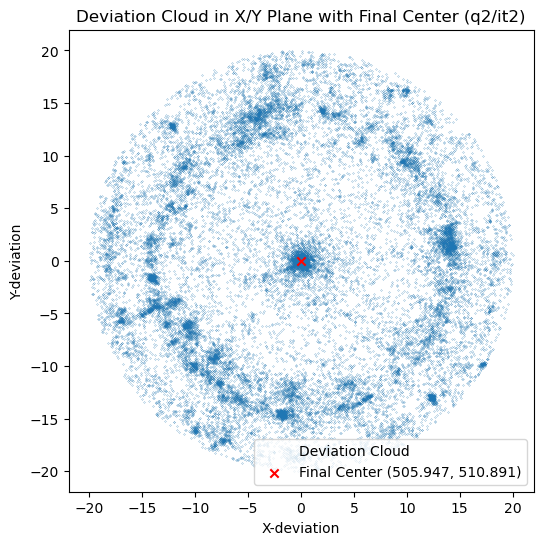

Quarter 2 processed in 1 iterations, final center = [505.947, 510.891], mean deviation = [6.838e-04,2.330e-04]


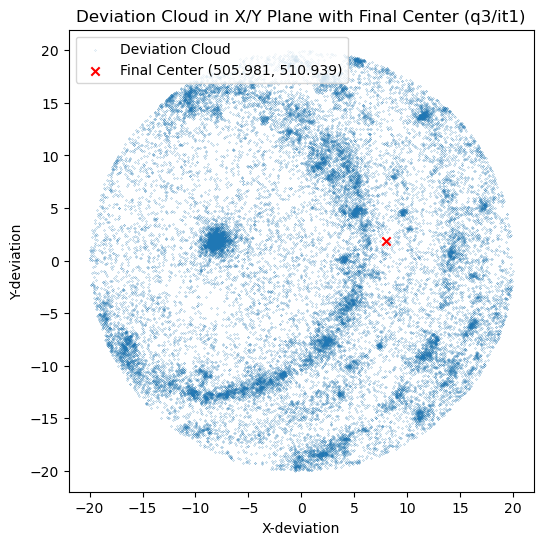

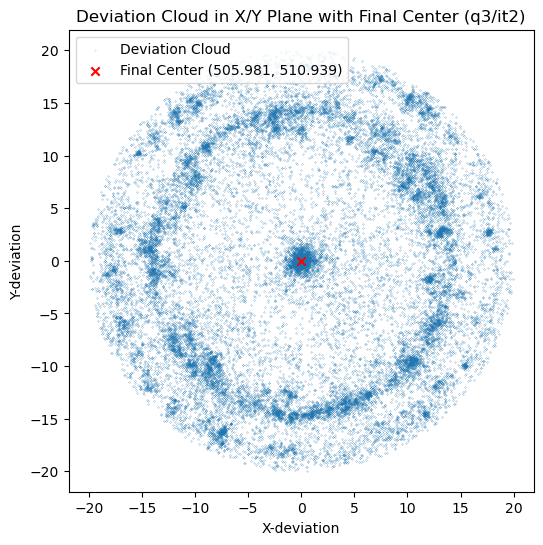

Quarter 3 processed in 1 iterations, final center = [505.981, 510.939], mean deviation = [4.725e-05,2.347e-04]


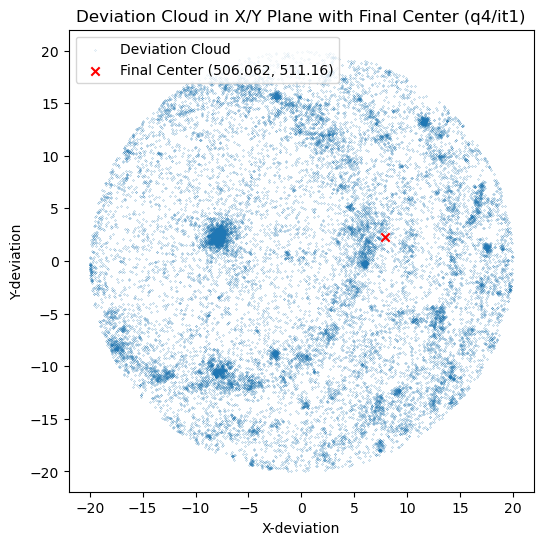

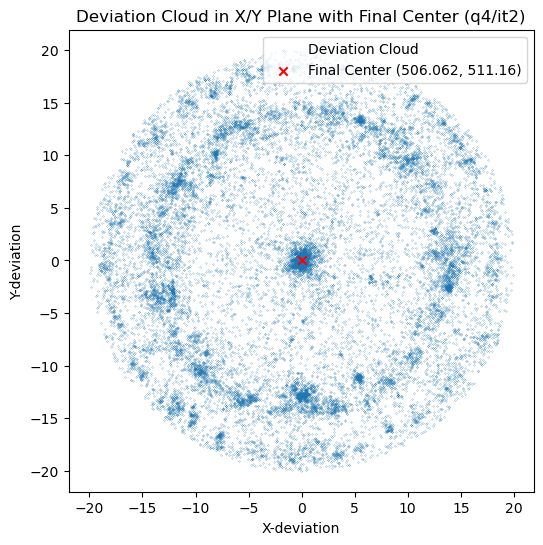

Quarter 4 processed in 1 iterations, final center = [506.062, 511.16], mean deviation = [9.542e-05,1.181e-04]
Interpolating centers based on linear fit
Scope of drift: 0.288 px in x, 0.542 px in y
Interpolated detector shifts written to HDF5 file


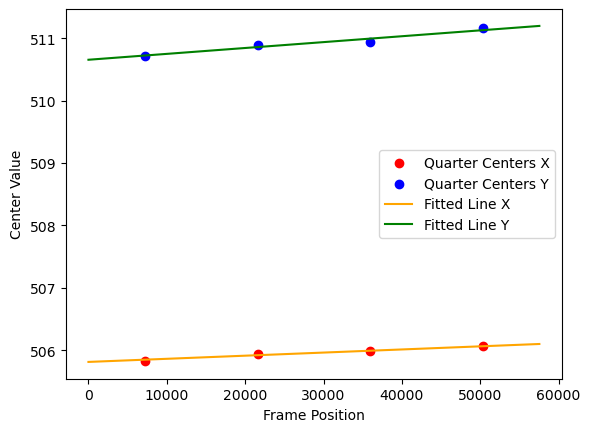

In [15]:
# Find Center Beam Spot Center
tolerance = 20 # If you know that your beam center is close to the center of the detector you can reduce the tolerance to reduce the processing time
min_peaks = 10 # Minimum number of peaks in a frame to be considered
resolution_limit = 150 # Maximum resolution of peaks to be considered in pixels
min_samples_fraction = 0.1  # Fraction of datapoints in the largest cluster to be accepted 
x0 = 510
y0 = 510

inputfolder_path= "/home/bubl3932/files/MFM300_VIII/MFM300_UK_2ndGrid_spot_4_220mm_0deg_150nm_50ms_20250524_1712"

##### Enter parameters above #####

find_files_and_run_centerfinding(inputfolder_path, x0, y0, tolerance, min_peaks, resolution_limit, min_samples_fraction)

Improve the center beam center with a LOWESS fit

In [27]:
# Center Beam Drift Refinement Function Definitions

from centerrefinement_def import find_files_and_run_centerrefinement


Working with MFM300_VIII_spot2_20250408_1511.h5
plotting LOWESS fit


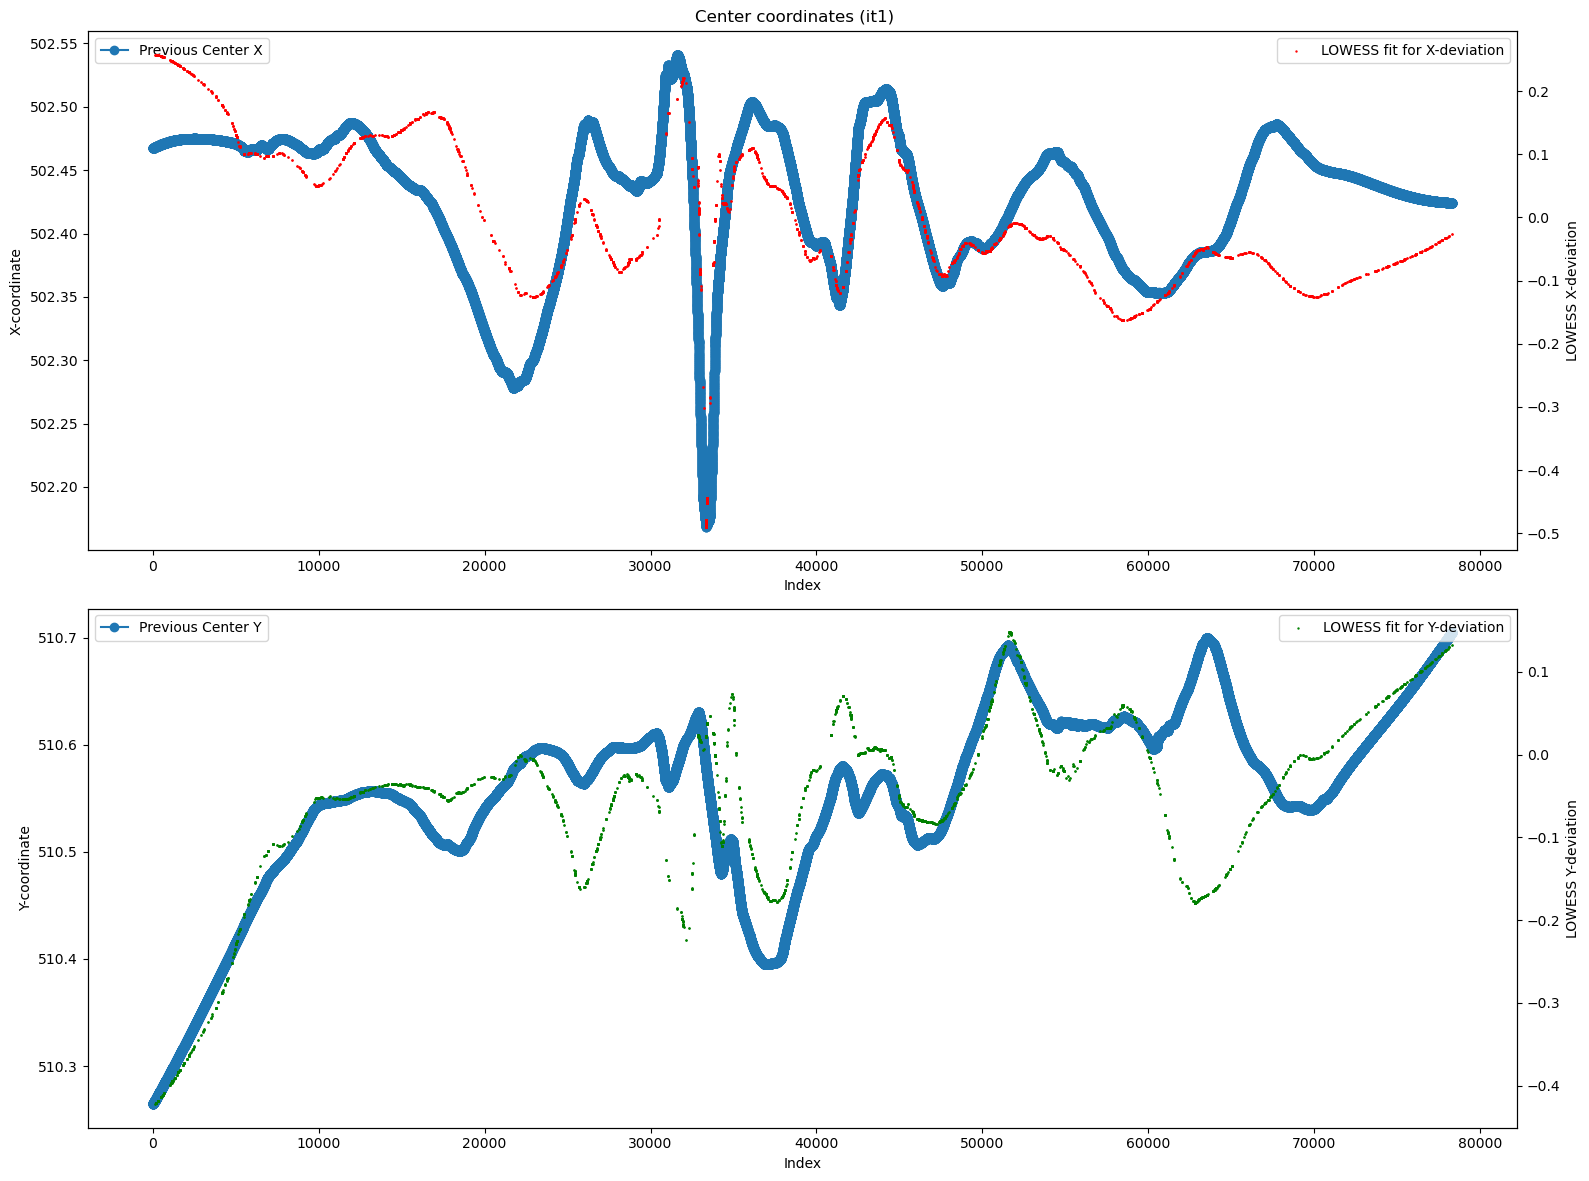

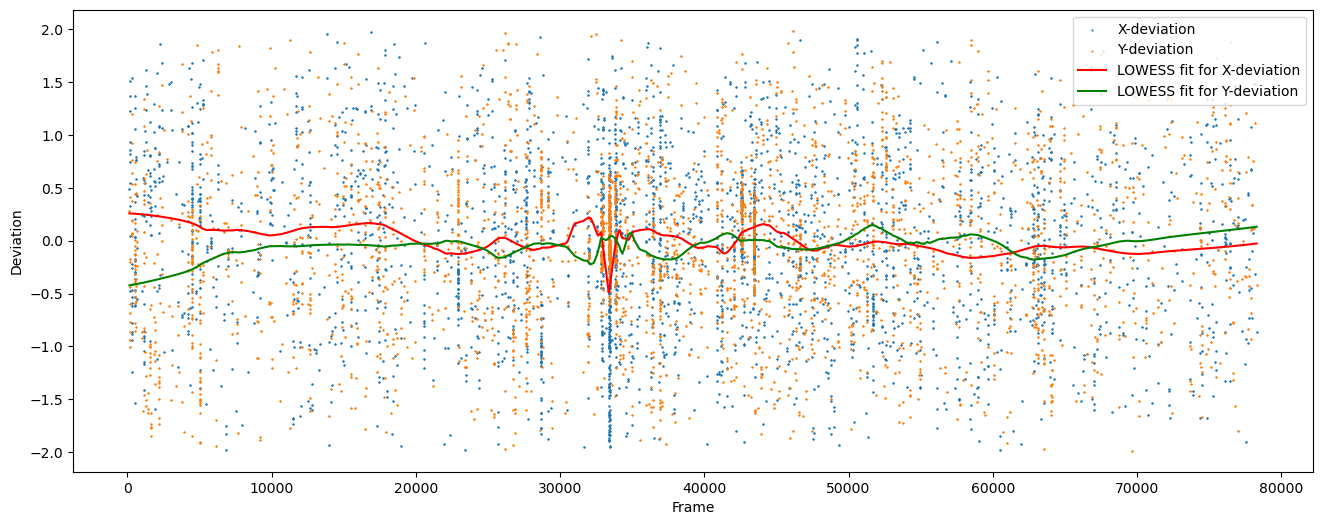

plotting LOWESS fit


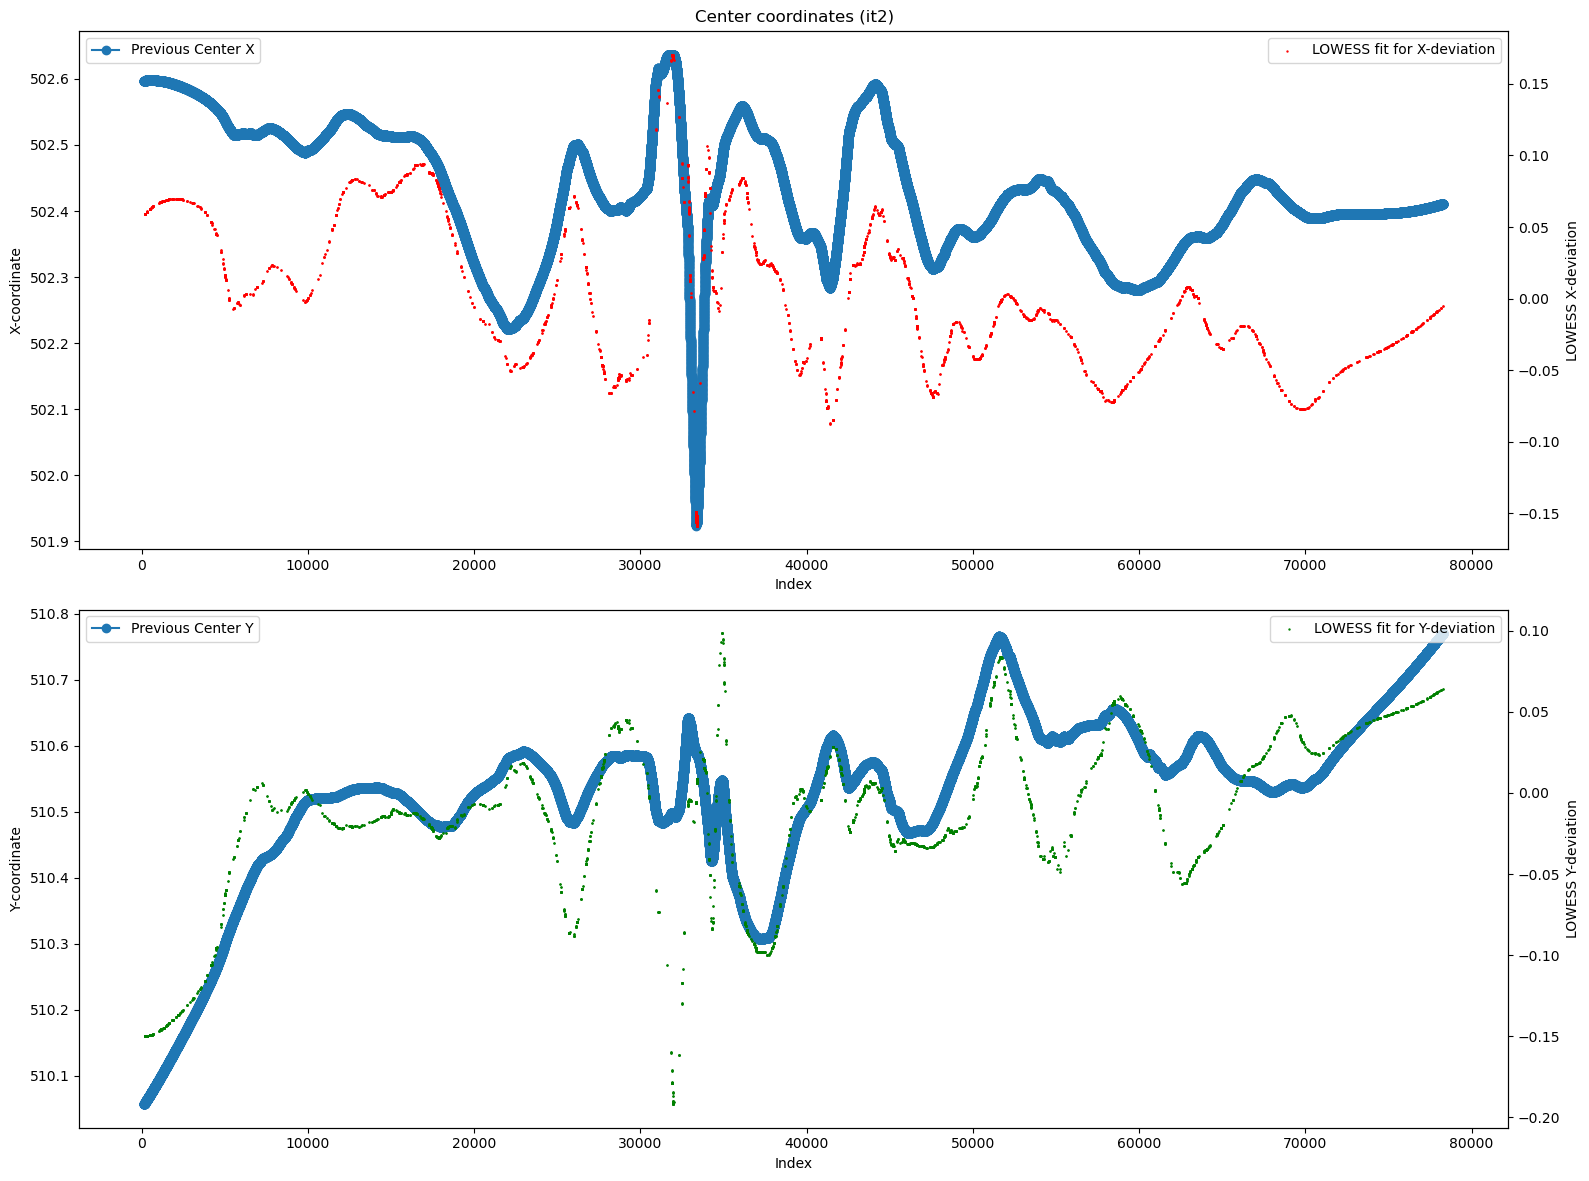

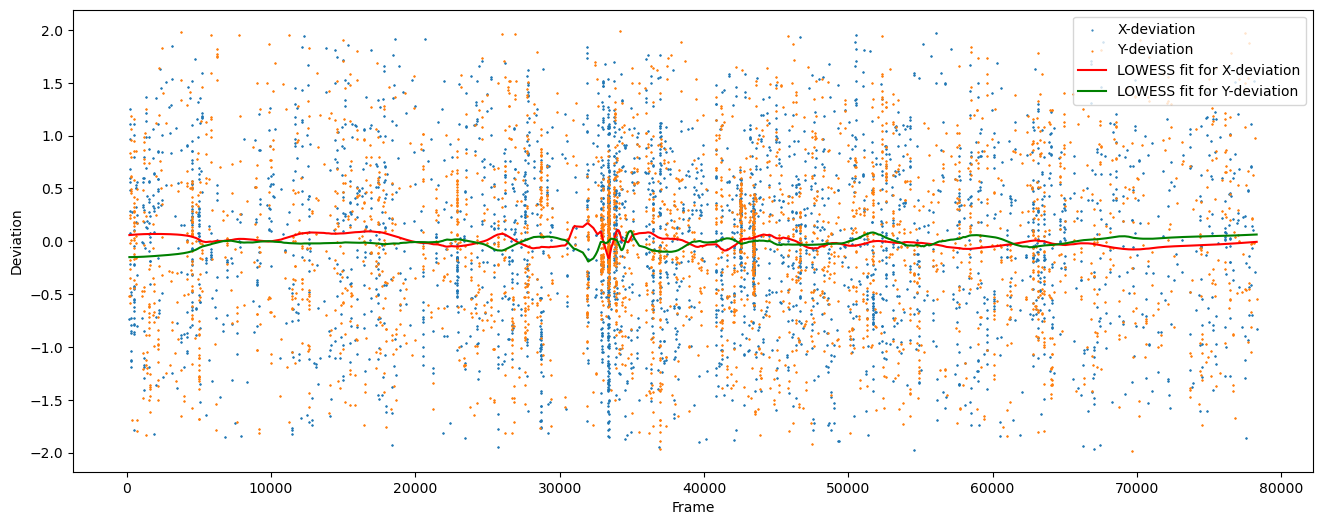

plotting LOWESS fit


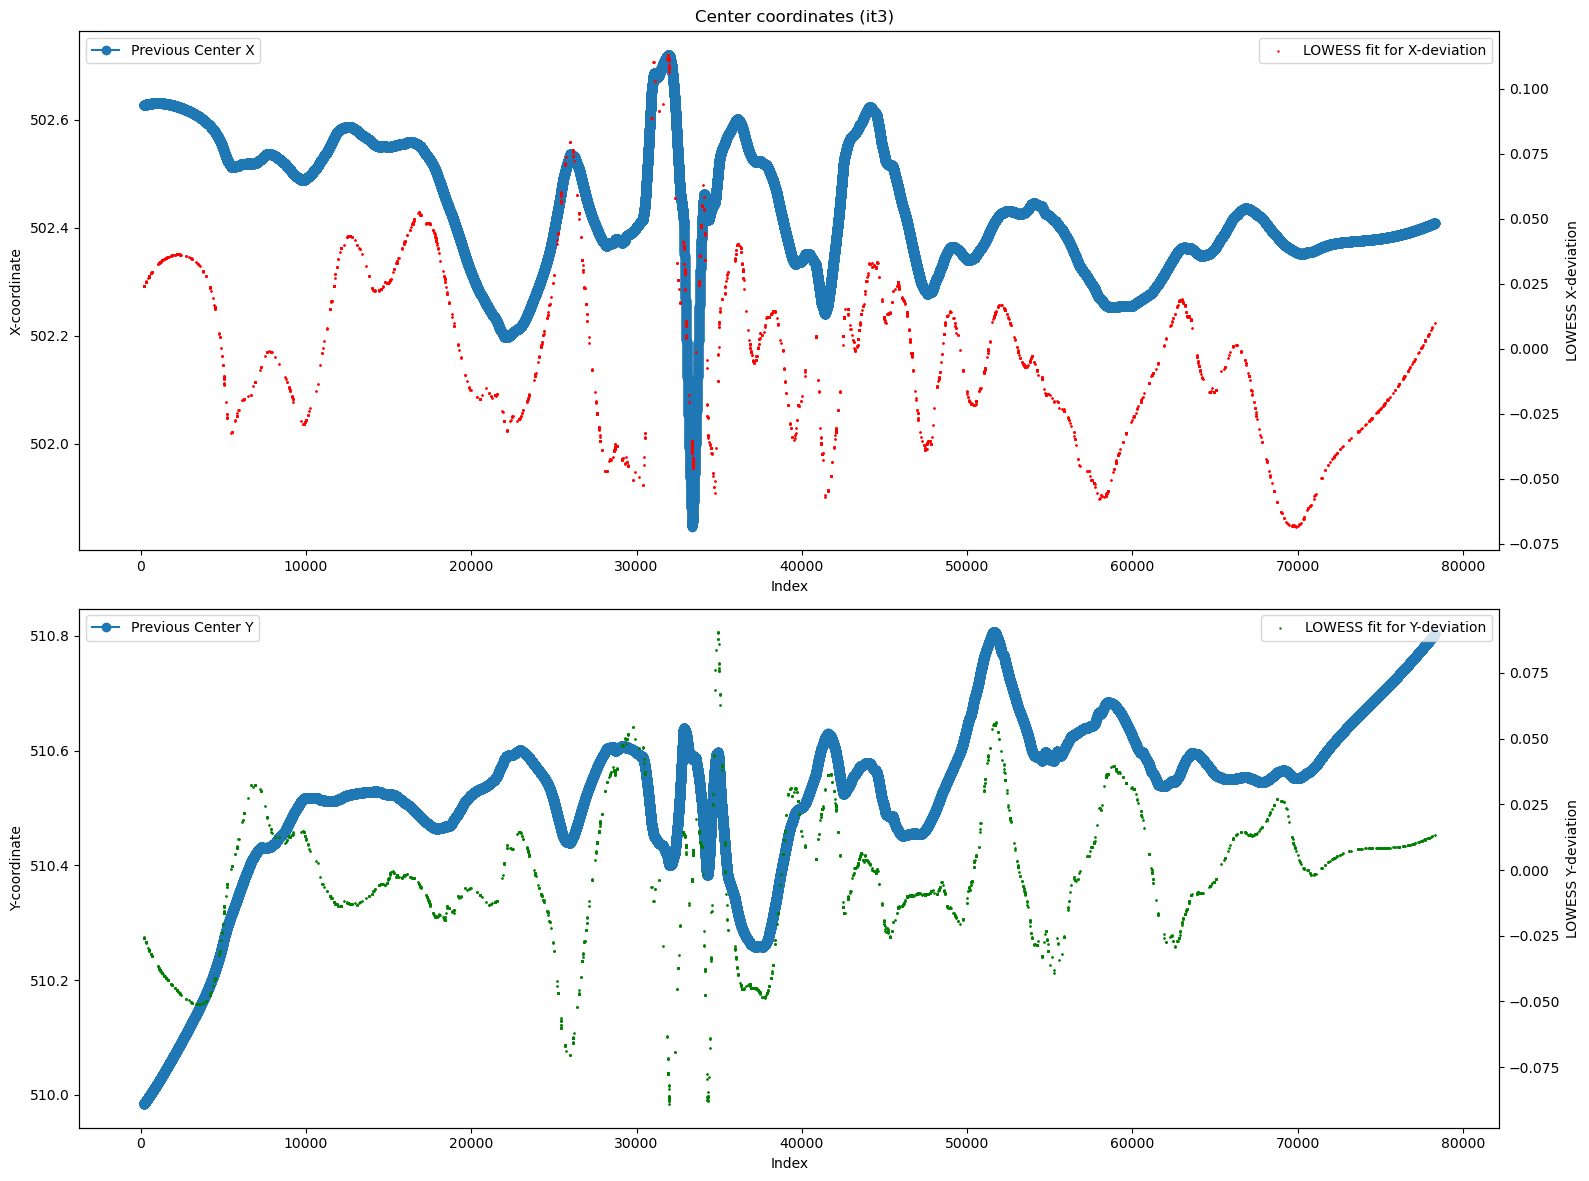

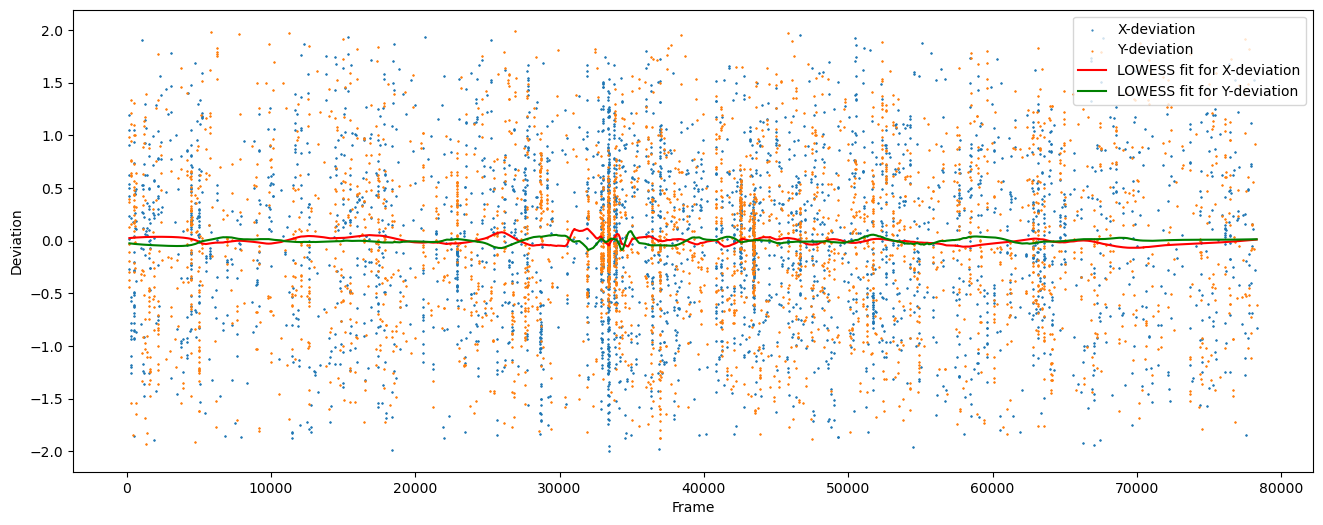

plotting LOWESS fit


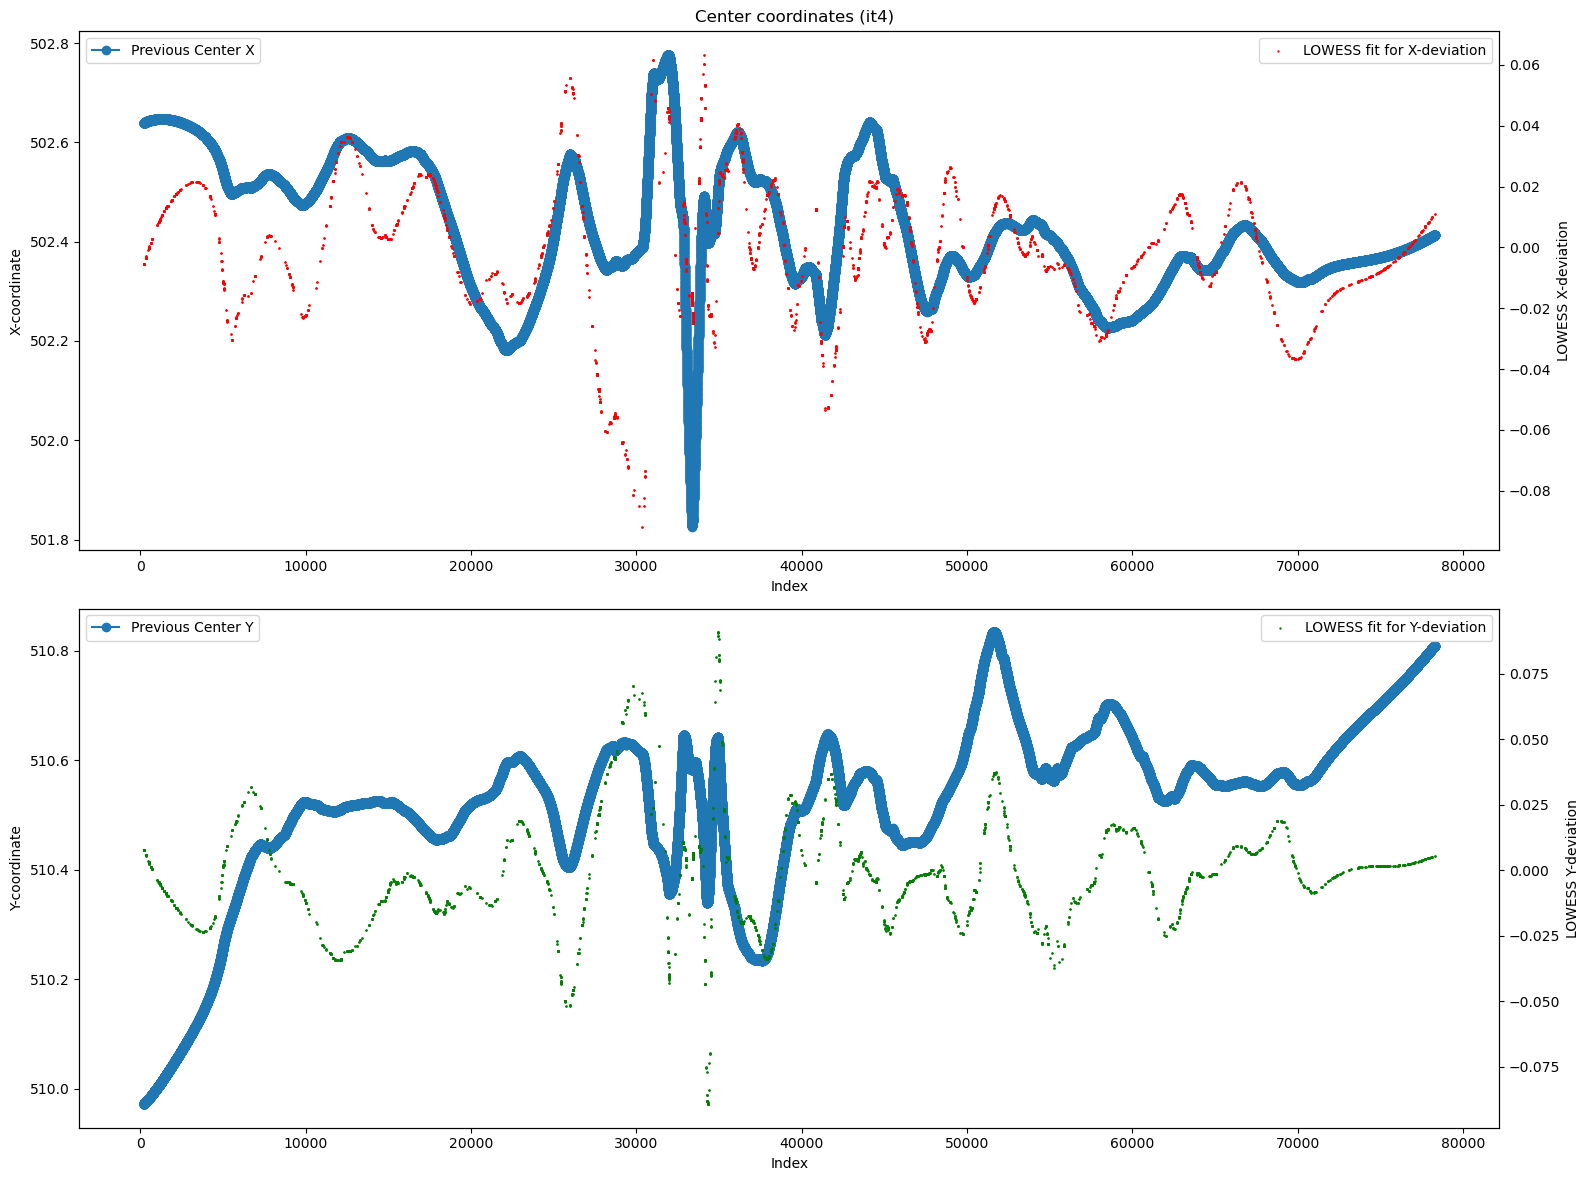

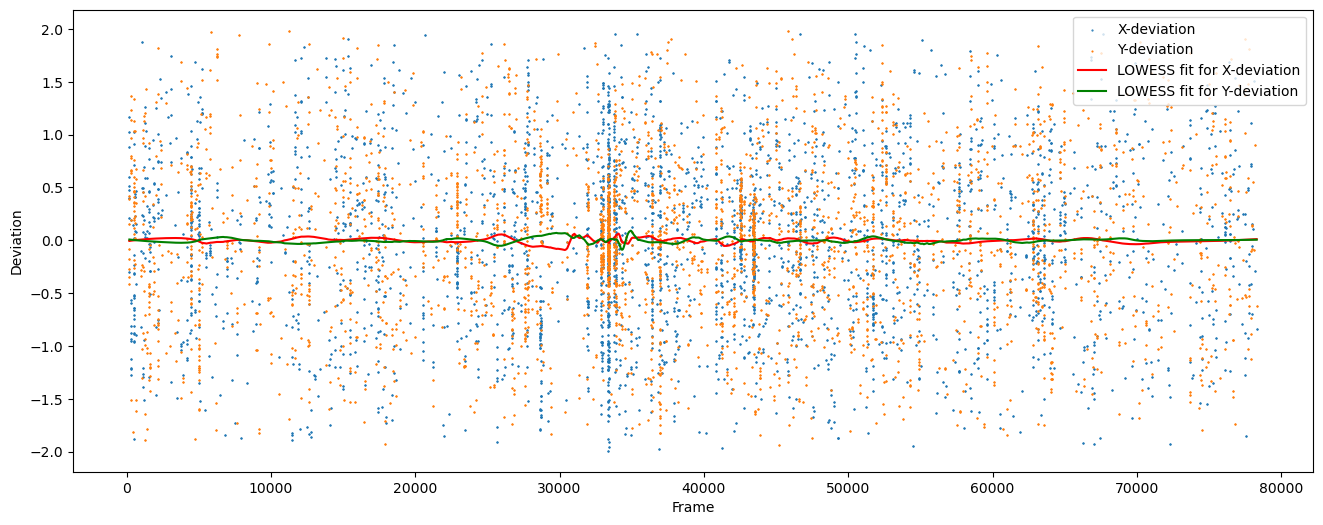

plotting LOWESS fit


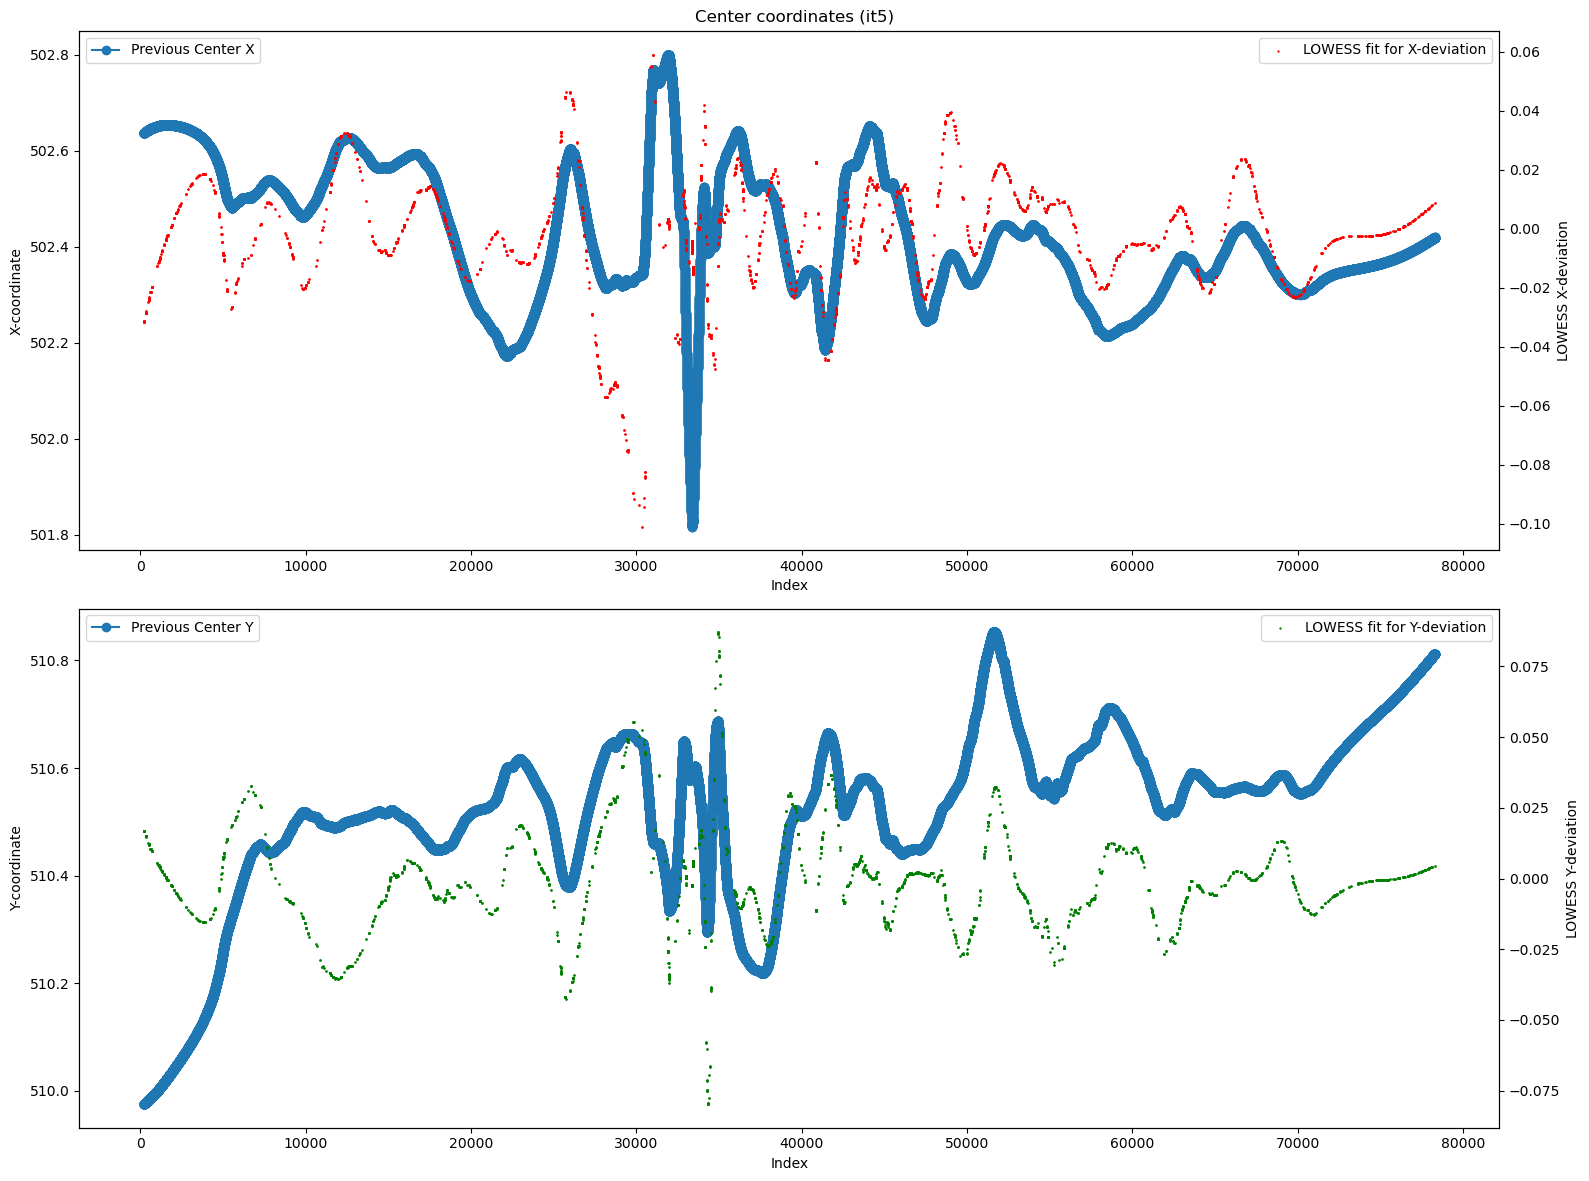

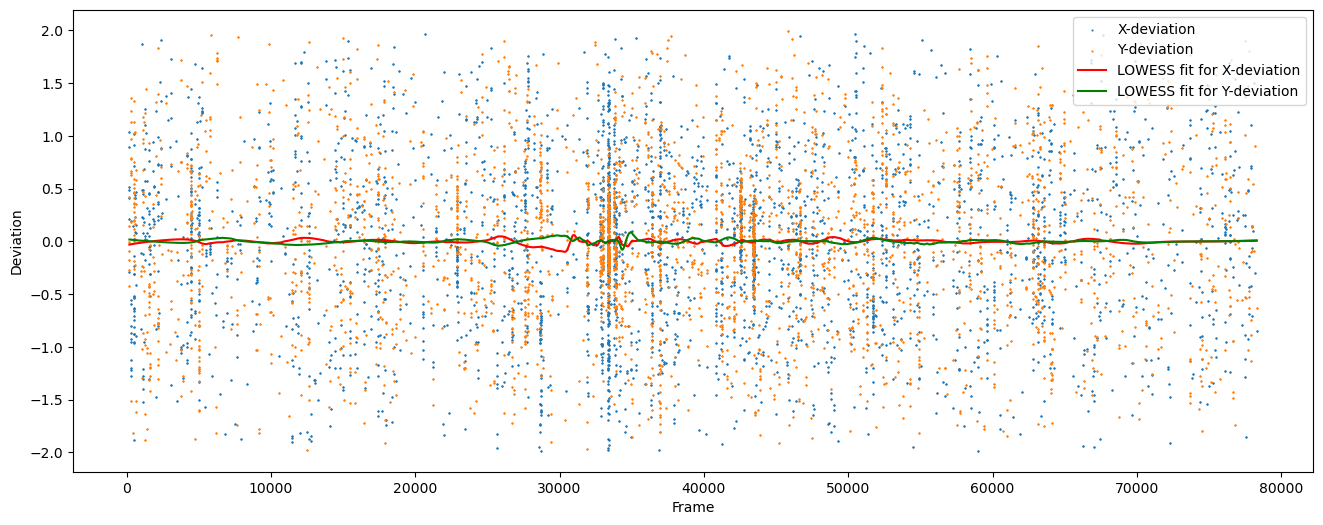

plotting LOWESS fit


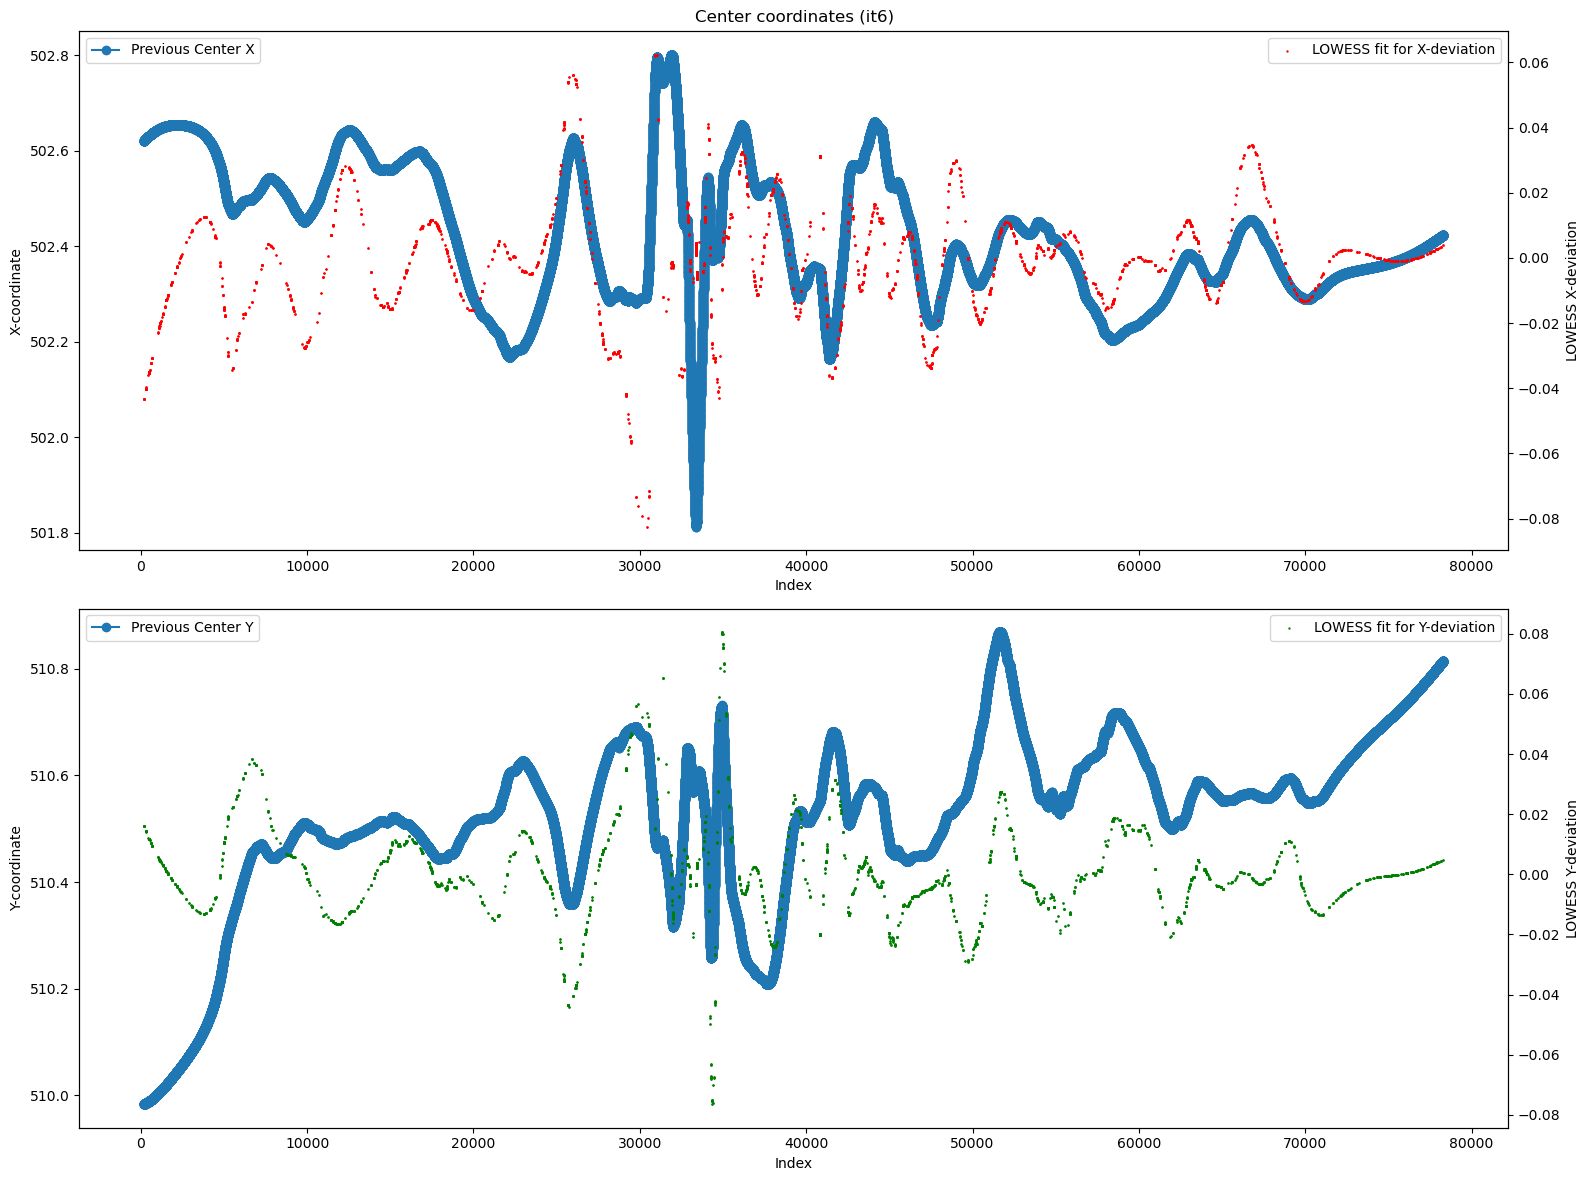

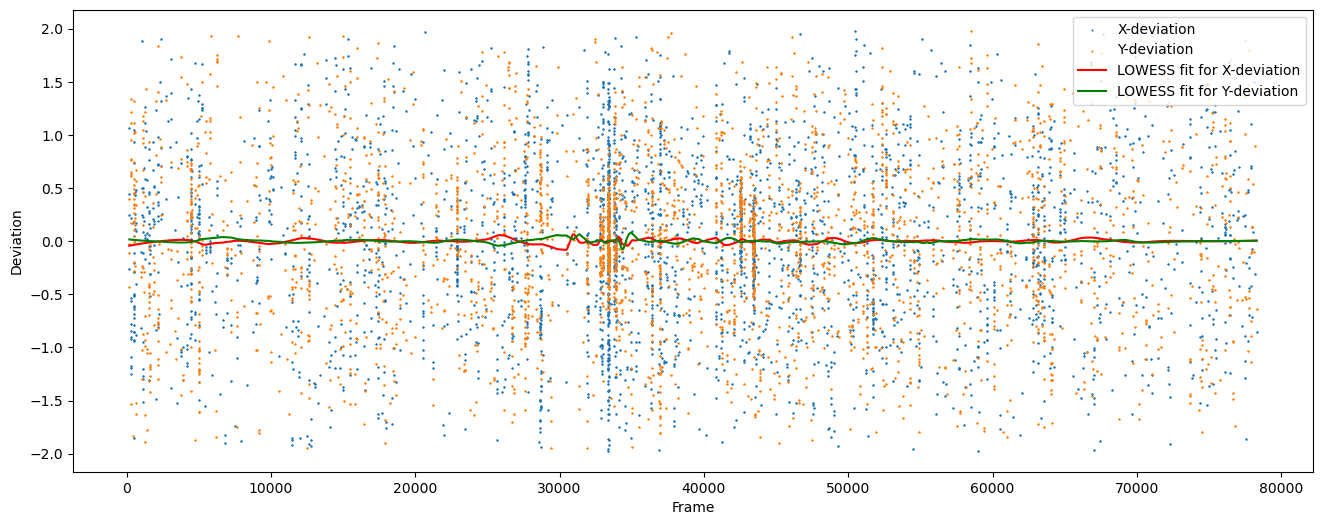

plotting LOWESS fit


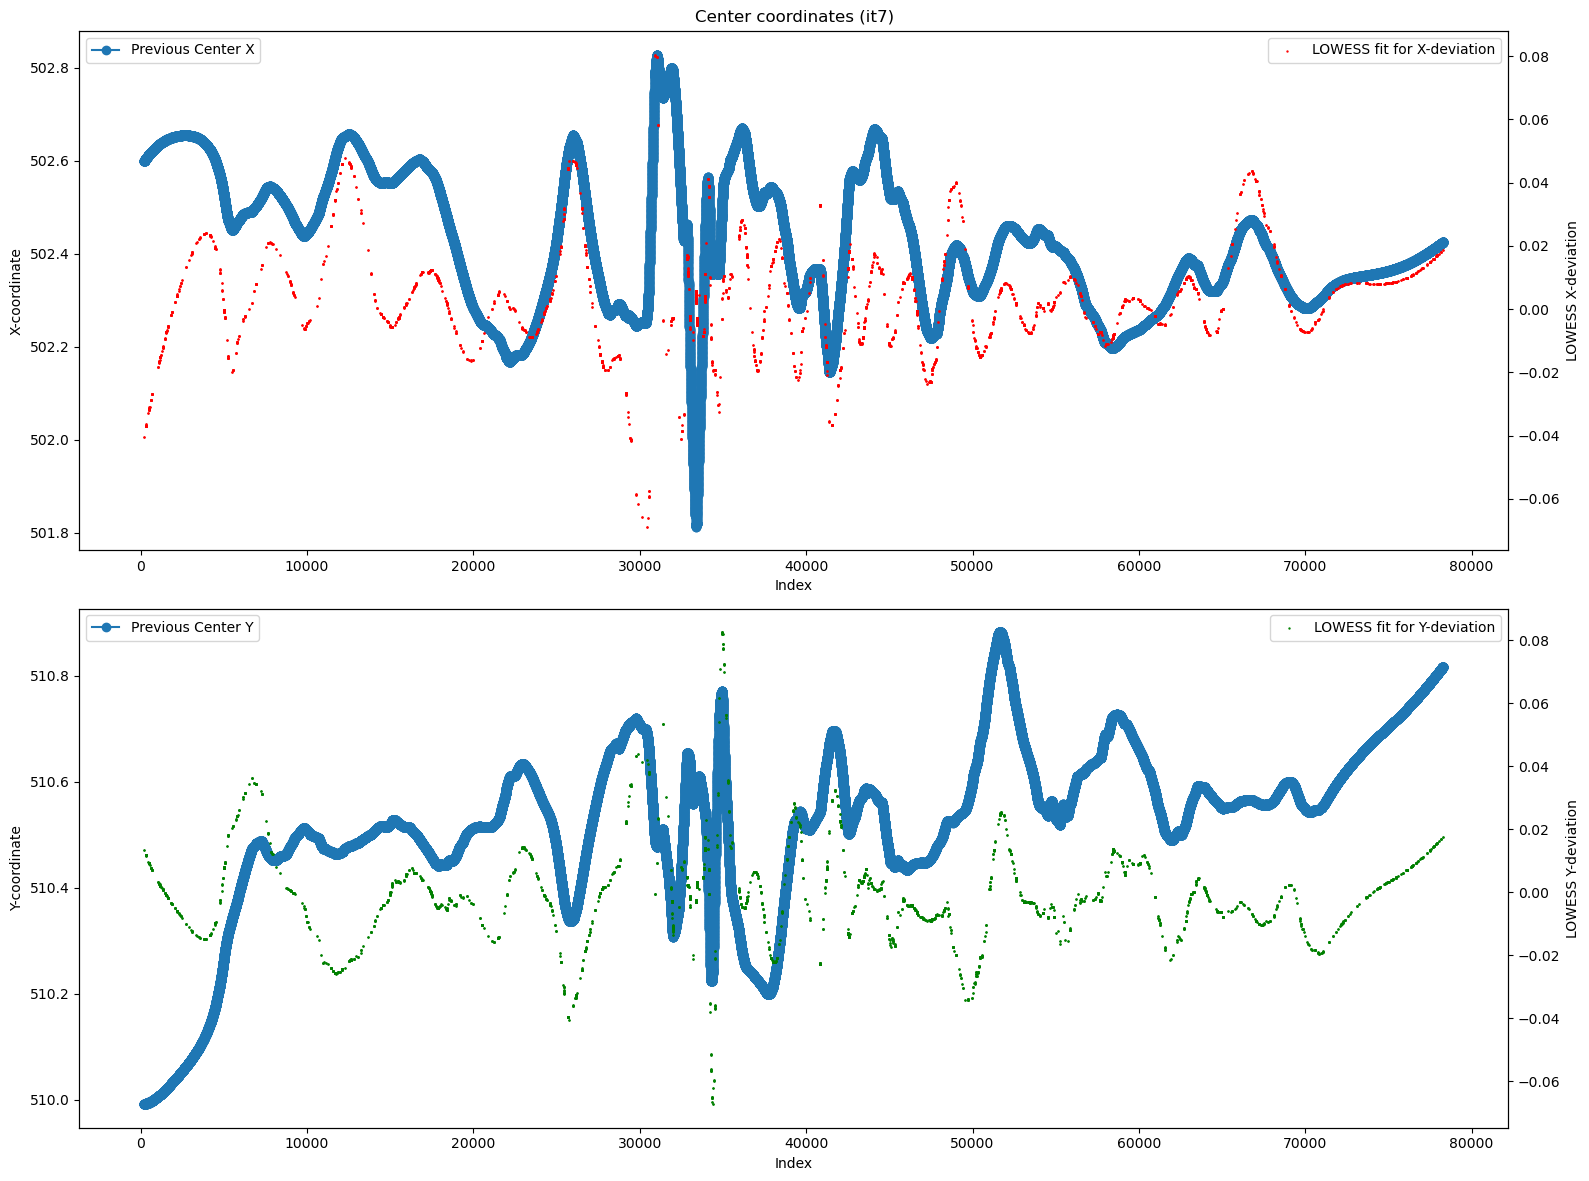

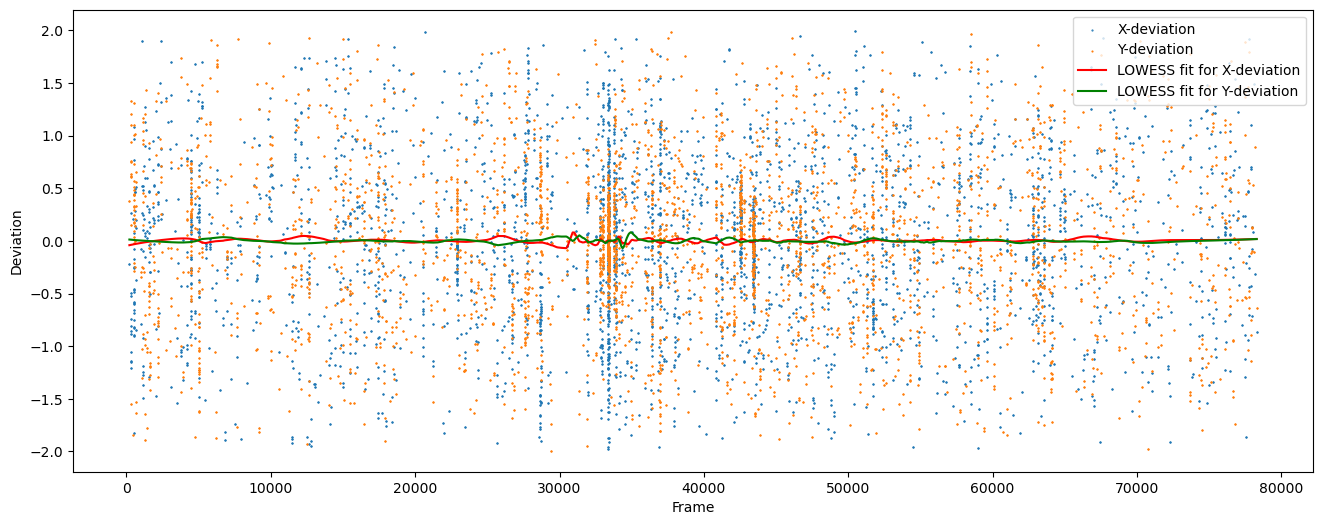

plotting LOWESS fit


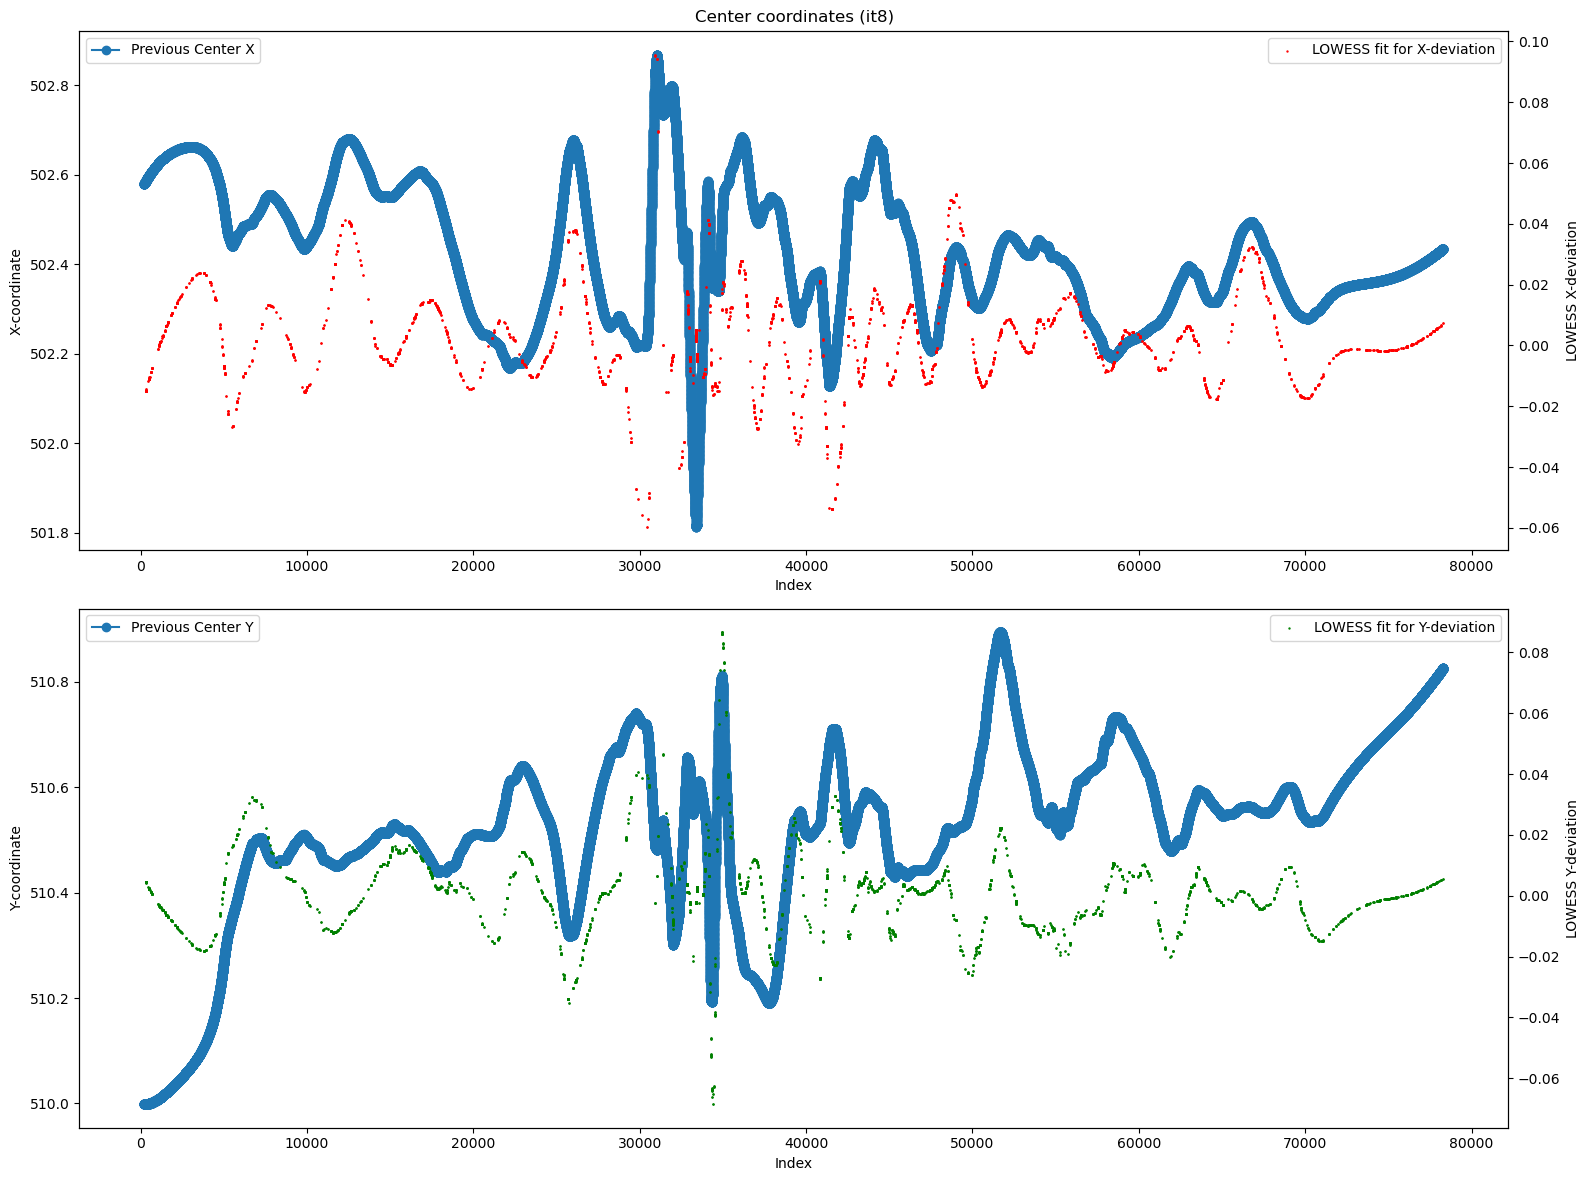

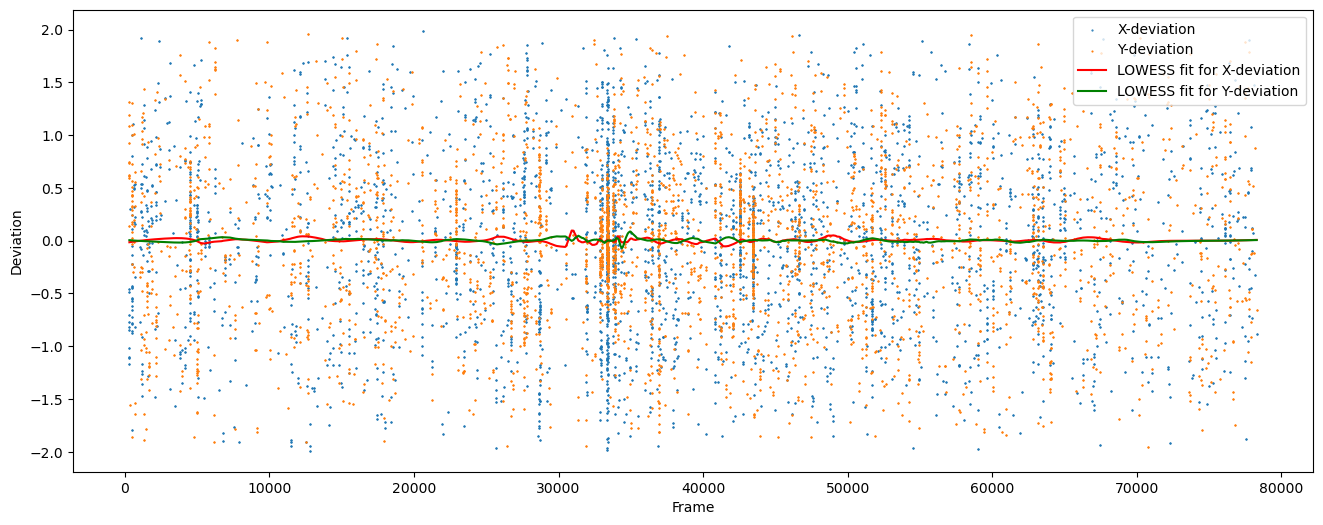

plotting LOWESS fit


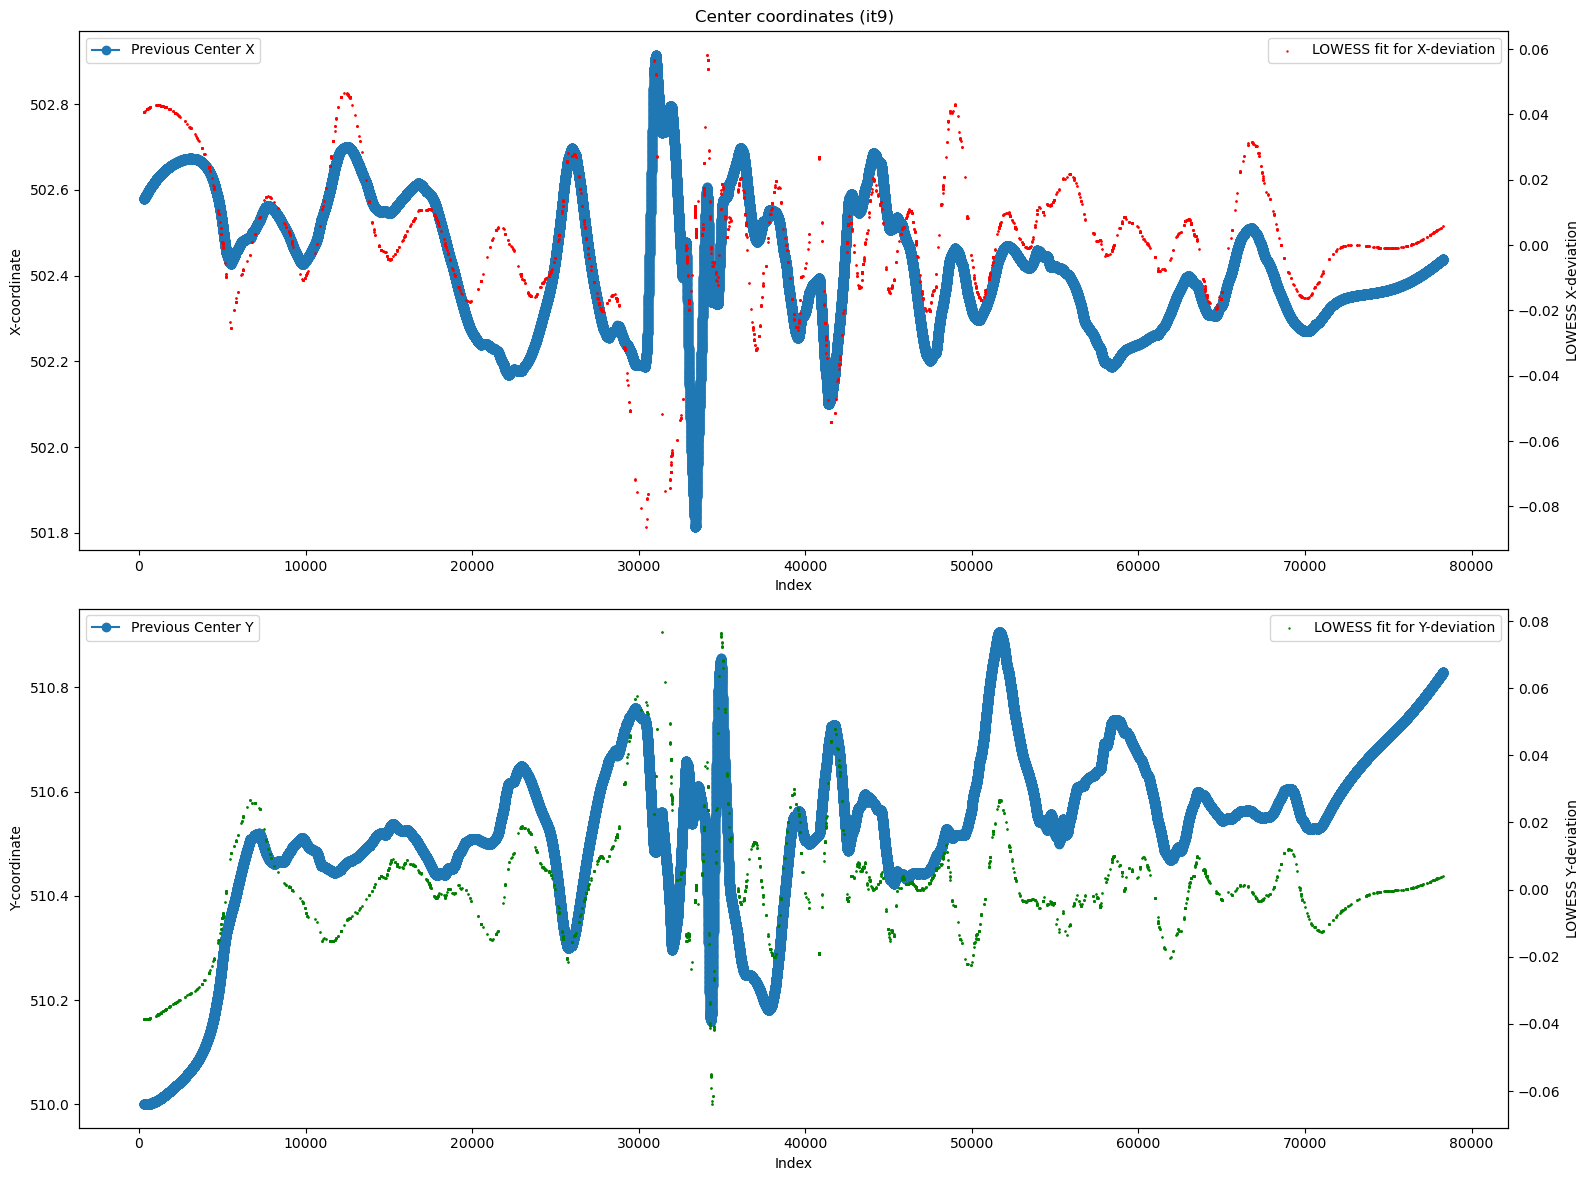

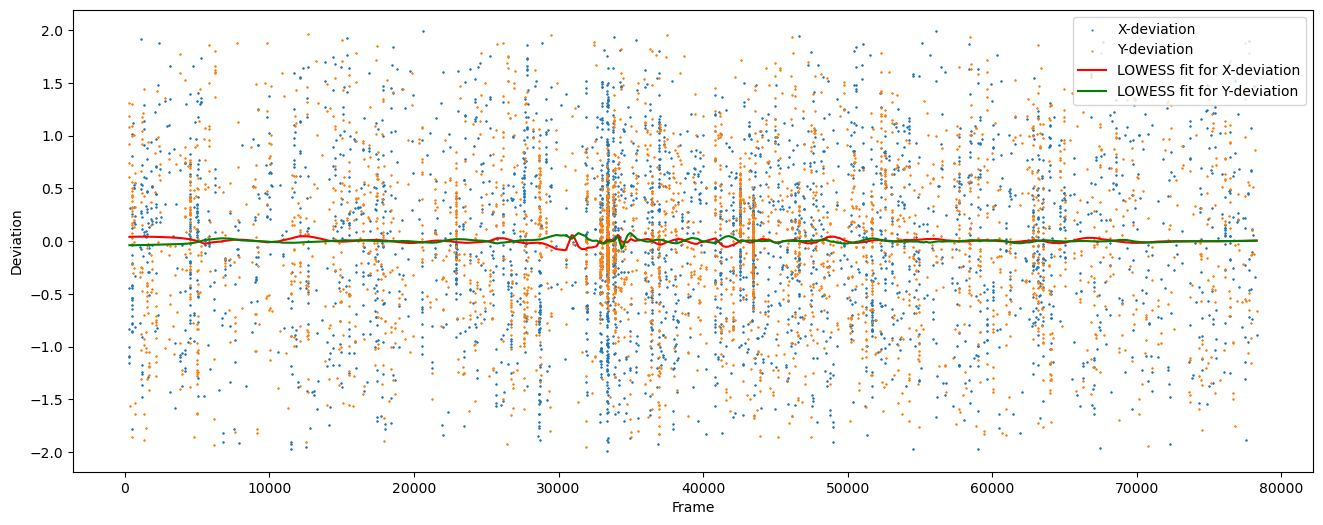

plotting LOWESS fit


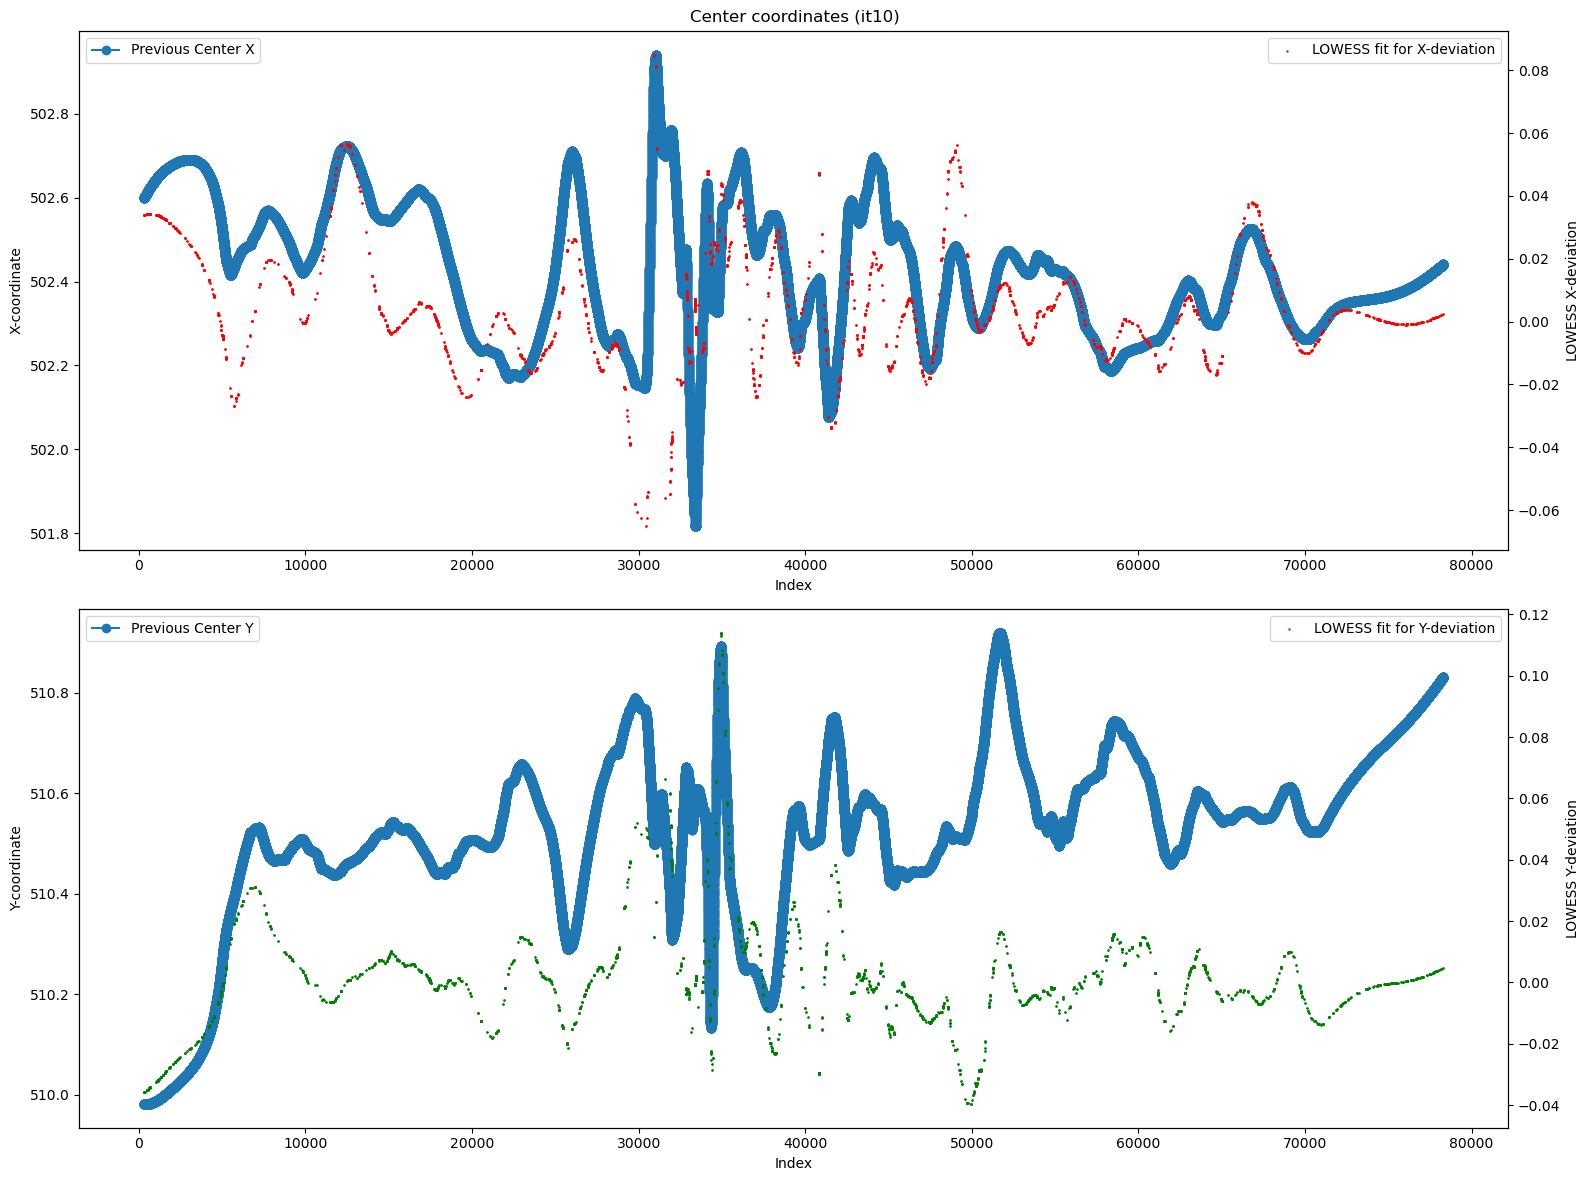

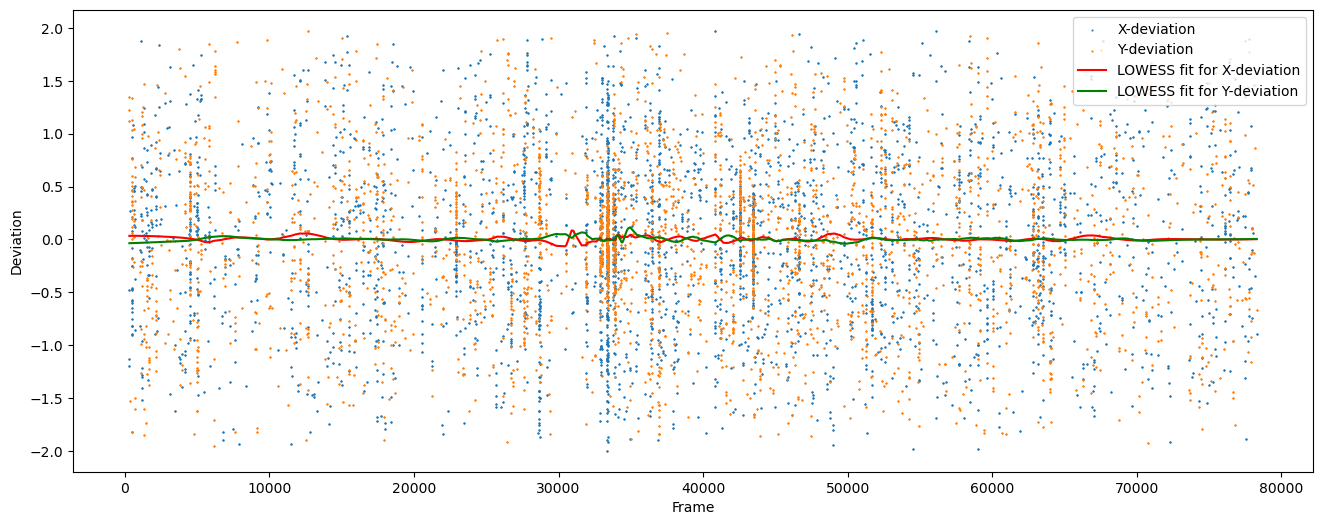

Could not meet convergenc criterion (0.05) after 10 iterations, refinement terminated
Updated detector shifts written to HDF5 file


In [30]:
# Center Beam Drift Refinement
tolerance = 2 # If you know that your beam center is close to the center of the detector you can reduce the tolerance to reduce the processing time
min_peaks = 20 # Minimum number of peaks in frame to be used for refinement
resolution_limit = 150 # Maximum resolution (pixels) of peaks to be considered for refinement
max_iterations = 10 # Maximum number of iterations for refinement
convergence_threshold = 0.05 # Refinement is stopped when the deviation of the LOWESS fit does not exceed the threshold (given in pixels)

inputfolder_path = '/home/bubl3932/files/MFM300_VIII/MFM300_VIII_spot2_20250408_1511'

##### Enter your parameters above #####

find_files_and_run_centerrefinement(inputfolder_path, tolerance, min_peaks, resolution_limit, max_iterations, convergence_threshold)

And now to find the indexing using xGandalf (layers = layers of step size )

In [4]:
# Indexing Function Definitions

from gandalf_iterator import gandalf_iterator

In [5]:
# Indexing (To speed up process make sure output stream is in wsl folder)
geomfile_path = "/home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5/UOX.geom"
cellfile_path = "/home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5/UOX.cell"
input_path =   "/home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5"
output_dir = input_path
output_file_base = "UOX_sim"

num_threads = 23
indexing_method = "xgandalf"
resolution_push = 0
integration_method = "rings"
int_radius = "4,5,8"
min_peaks = 15
xgandalf_tolerance = 0.02
xgandalf_sampling_pitch = 5
xgandalf_iterations = 1
tolerance = "5,5,5,5"
step_size = 0.01
layers = 0
##### Enter your parameters above #####

gandalf_iterator(geomfile_path, cellfile_path, input_path, output_file_base, output_dir, num_threads, indexing_method, resolution_push, integration_method, int_radius, min_peaks, xgandalf_tolerance, xgandalf_sampling_pitch, xgandalf_iterations, tolerance, step_size, layers)


'list.lst' has been created with 1 entries at /home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5/list.lst


Processing XY pairs:   0%|          | 0/1 [00:00<?, ?it/s]

Running for x=-512, y=-512


This is what I understood your unit cell to be:
orthorhombic I, right handed.
a      b      c            alpha   beta  gamma
 80.58  94.49 103.89 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: on
 Multi-lattice indexing ("delete and retry"): off
                              Retry indexing: on
39 images processed, 39 hits (100.0%), 39 indexable (100.0% of hits, 100.0% overall), 39 crystals, 7.8 images/sec.
82 images processed, 82 hits (100.0%), 79 indexable (96.3% of hits, 96.3% overall), 79 crystals, 8.4 images/sec.
128 images processed, 128 hits (100.0%), 122 indexable (95.3% of hits, 95.3% overall), 122 crystals, 8.9 images/sec.
170 images processed, 170 hits (100.0%), 158 indexable (92.9% of hits, 92.9% overall), 158 crystals,

Then based on RMSD between found peaks and indexed reflections combine the best indexings from xGandalf for each frame to one .stream file and then write a .sol from combinded .stream file.

In [ ]:
# Find Best Results Function Definitions

from best_results_def import find_best_results, read_stream_write_sol

In [ ]:
# Find Best Results
inputfolder_path = '/home/buster/hMTH1_TH287'
lattice = "oP" # Pearson Symbol read from .cell file first letter for lattice type and second for centering

##### Enter your parameters above #####

find_best_results(inputfolder_path)

import os

output_file_path = os.path.join(inputfolder_path, "best_results.stream")

read_stream_write_sol(output_file_path, lattice)

Integrate with best found ring for integration (From Fast Integration)

In [ ]:
# Full Integration Function Definitions

from full_int_def import run_indexamajig_with_frames

In [ ]:
# Full Integration
geomfile_path = ".geom"
cellfile_path = ".cell"
input_path = ""

x = -512
y = -512
num_threads = 23
indexing_method = "file"
resolution_push = 5
integration_method = "rings"
int_radius = "4,5,9"
min_peaks = 5
xgandalf_tolerance = 0.02
xgandalf_sampling_pitch = 5
xgandalf_min_vector_length = 40
xgandalf_max_vector_length = 110
xgandalf_iterations = 1
tolerance = "5,5,5,5"
overpredict = True

##### Enter your parameters above #####

run_indexamajig_with_frames(x, y, geomfile_path, cellfile_path, input_path, num_threads, indexing_method, resolution_push, integration_method, int_radius, min_peaks, xgandalf_tolerance, xgandalf_sampling_pitch, xgandalf_iterations, tolerance)

Merge integration results

In [ ]:
# Full Merge Function Definitions

from full_merge_def import merge_and_write_mtz

In [ ]:
# Merge
input_folder_path = ""
cellfile_path = ""
pointgroup = ""

##### Enter your parameters above #####

merge_and_write_mtz(input_folder_path, cellfile_path, pointgroup)

Refinement using REFMAC5

In [ ]:
# Full Refine Function Definitions

from full_ref_def import process_run_folders

In [ ]:
# Full Refine

run_number = 1
bins = 30

# Global variables for filenames
base_path = ""
pdb_filename = ".pdb"
mtz_orig_filename = "output.mtz"
output_filename = f"output_bins_{bins}.txt"

process_run_folders(base_path, run_number)